In [55]:
from PIL import Image
import hdbscan
import time
import seaborn as sns
import pickle
import numpy as np
import pandas as pd
from umap import UMAP
from image_helpers import *
from image_helpers import _square_sizer
from tsne import image_scatter_plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
sns.set_context("poster")
%pylab inline

import warnings
warnings.filterwarnings('ignore')
pylab.rcParams['figure.figsize'] = (15, 15)

Populating the interactive namespace from numpy and matplotlib


In [2]:
data, paths, encodings, arrays_rescaled, X = load_encodings('../data/CM_ALL_faces_encodings.pickle')
data_, paths_, encodings_, arrays_rescaled_, X_ = load_encodings('../data/AM_ALL_faces_encodings.pickle')
arrays_rescaled.extend(arrays_rescaled_) , encodings.extend(encodings_), paths.extend(paths_)

X = np.concatenate((X, X_)) 
len(encodings), len(paths), len(arrays_rescaled), X.shape[0]

(2739, 2739, 2739, 2739)

In [30]:
df = pd.DataFrame().from_csv(
        '../data/filename_to_rating_lookup_ALL.csv', 
        index_col=[0]
    ) 
    
look_up_file_to_attractiveness_rating = dict(zip(df['Filename'], df['Rating']))
paths = [file_path.replace('_face', '').split('/')[-1] for file_path in paths]
colors_dic = [look_up_file_to_attractiveness_rating.get(just_file_name) for just_file_name in paths]
pd.Series(colors_dic).value_counts()

3    1417
2     488
4     421
5     311
1     102
dtype: int64

In [27]:
colors_pal = sns.color_palette('deep', 5)
colors_pal

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.6980392156862745),
 (0.8, 0.7254901960784313, 0.4549019607843137)]

In [31]:
attractiveness_colors_lis=[]
for color_number in colors_dic:
    attractiveness_colors_lis.append(colors_pal[color_number - 1])

pd.Series(attractiveness_colors_lis).value_counts()

(0.7686274509803922, 0.3058823529411765, 0.3215686274509804)     1417
(0.3333333333333333, 0.6588235294117647, 0.40784313725490196)     488
(0.5058823529411764, 0.4470588235294118, 0.6980392156862745)      421
(0.8, 0.7254901960784313, 0.4549019607843137)                     311
(0.2980392156862745, 0.4470588235294118, 0.6901960784313725)      102
dtype: int64

In [72]:
params = {
    #5 to 50, with a choice of 10 to 15 being a sensible default.
    "n_neighbors":15,

    #0.001 to 0.5, with 0.1 being a reasonable default.
    "min_dist":0.001,

    #metric: This determines the choice of metric used to measure distance in the input space. 
    "metric":'euclidean'
}

umap_embeddings = UMAP(**params).fit_transform(encodings)

xx = umap_embeddings[:, 0]
yy = umap_embeddings[:, 1]

## Globally Two distinct oval shaped clusters: Asian and white

So distinct that they occupy opposite corners of the plane, however they do intersect along the same axis e.g. the ends / poles of the ovals. Locally, this area is where the most attractives are clustered. 

So there's a pattern among both of the clusters. There's an agreeable look despite the ethnicity.

Jamie occupies around the middle of the density and his second picture seems to also rate very white. Using optimal local settings however Jamie departs into his own cluster where Keanu reeves is present

```
params = {
    #5 to 50, with a choice of 10 to 15 being a sensible default.
    "n_neighbors":15,

    #0.001 to 0.5, with 0.1 being a reasonable default.
    "min_dist":0.001,

    #metric: This determines the choice of metric used to measure distance in the input space. 
    "metric":'euclidean'
}

```

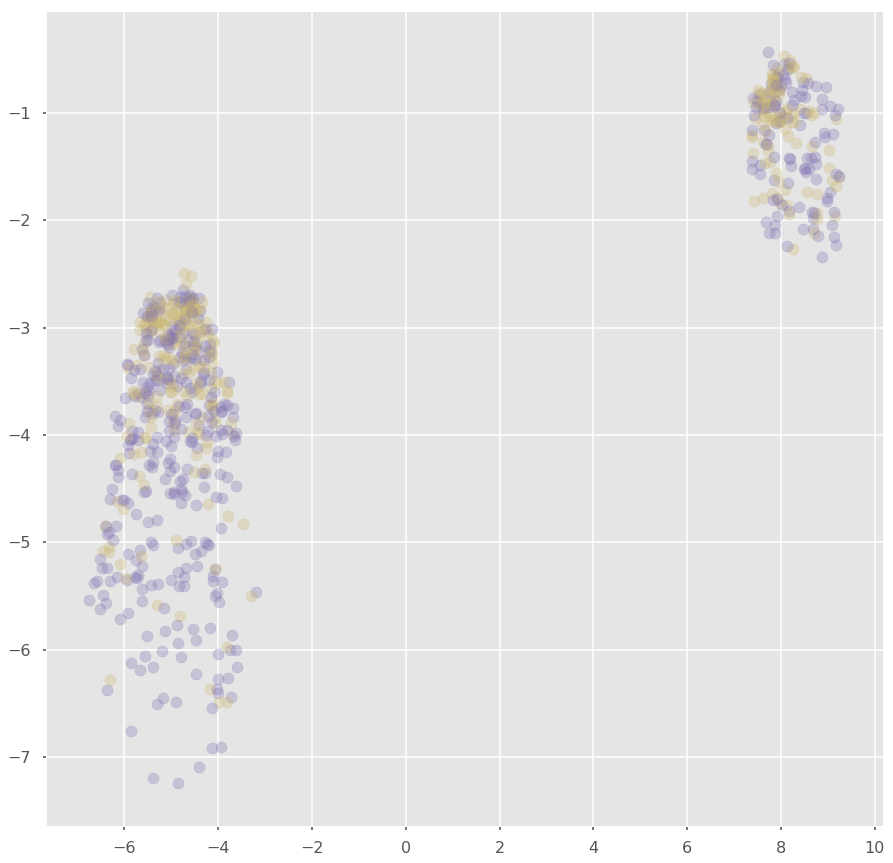

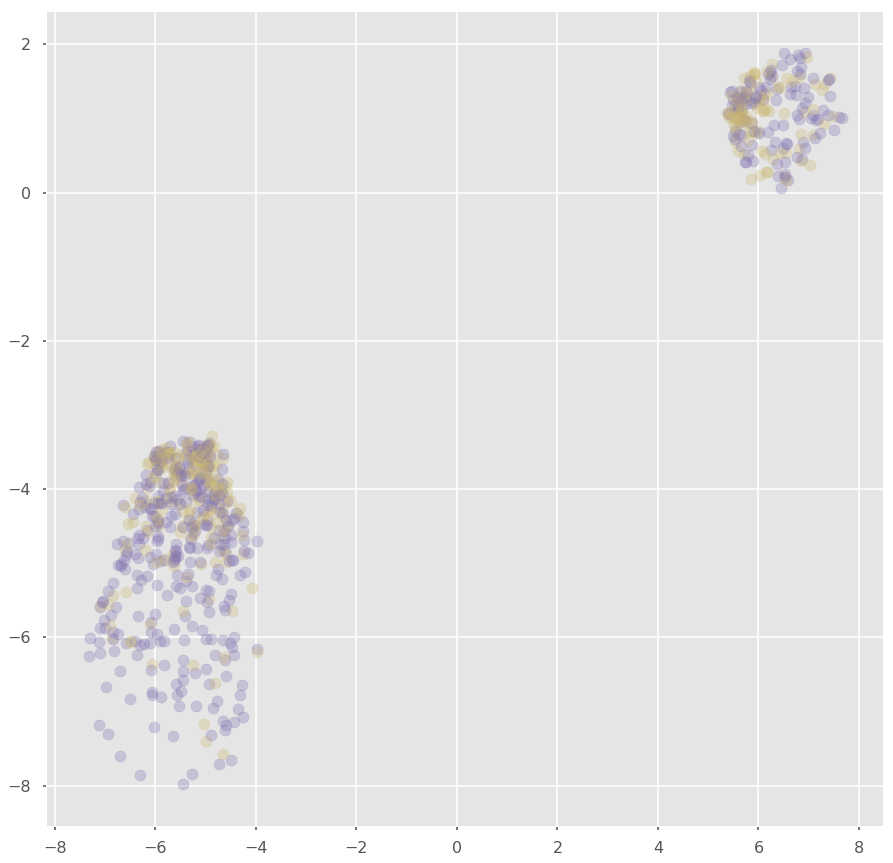

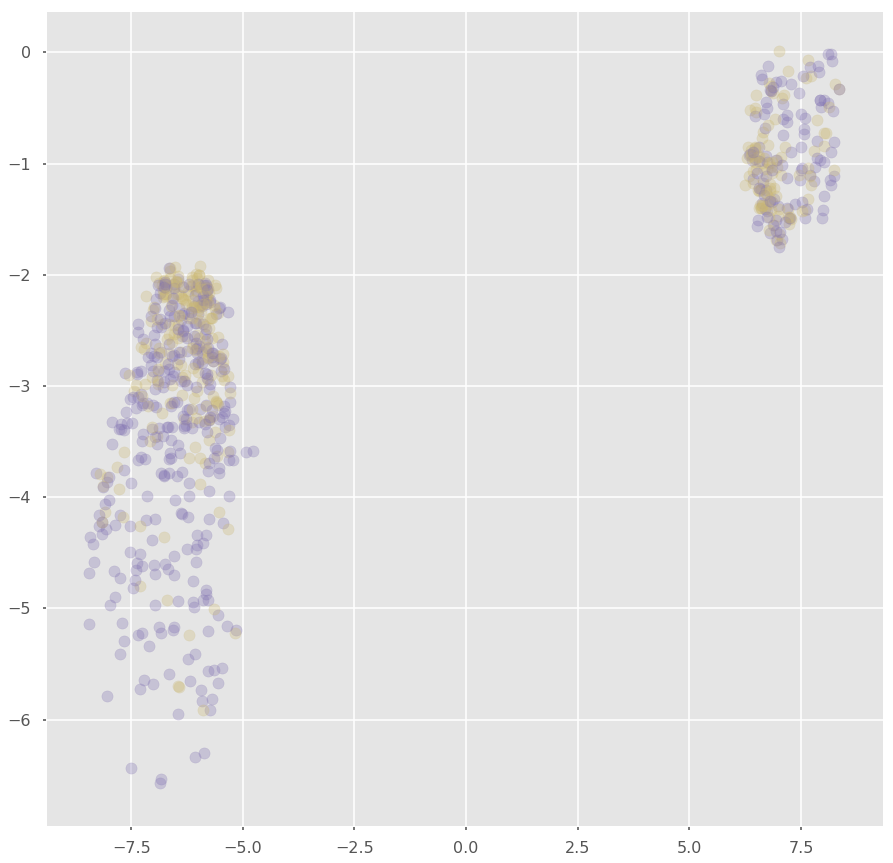

In [79]:
for _ in range(3):
    params = {
        #5 to 50, with a choice of 10 to 15 being a sensible default.
        "n_neighbors":15,

        #0.001 to 0.5, with 0.1 being a reasonable default.
        "min_dist":0.001,

        #metric: This determines the choice of metric used to measure distance in the input space. 
        "metric":'euclidean'
    }


    umap_embeddings = UMAP(**params).fit_transform(encodings)


    xx = umap_embeddings[:, 0]
    yy = umap_embeddings[:, 1]




    for x, y, c in zip(xx, yy, attractiveness_colors_lis): 
        if  c in {colors_pal[3], colors_pal[4]}: 
            plt.scatter(x, y, color=c, alpha=0.3)
    plt.show()

Using optimal local settings however Jamie departs into his own cluster where Keanu reeves is present

reran:
```
params = {
    #5 to 50, with a choice of 10 to 15 being a sensible default.
    "n_neighbors":5,

    #0.001 to 0.5, with 0.1 being a reasonable default.
    "min_dist":0.001,

    #metric: This determines the choice of metric used to measure distance in the input space. 
    "metric":'euclidean'
}
```

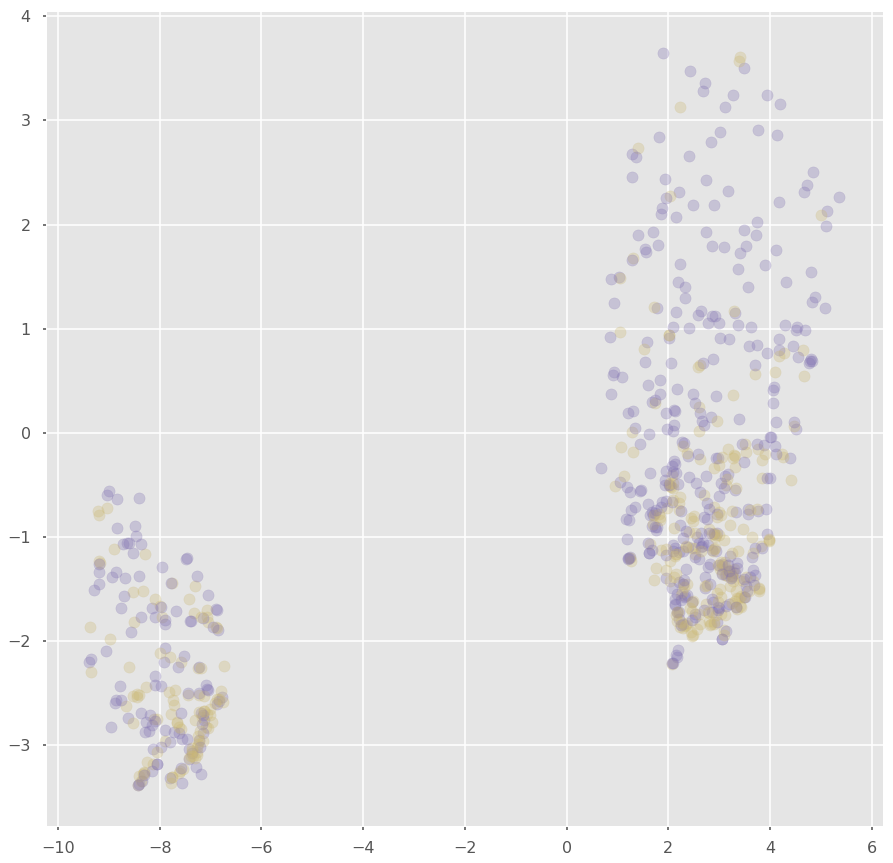

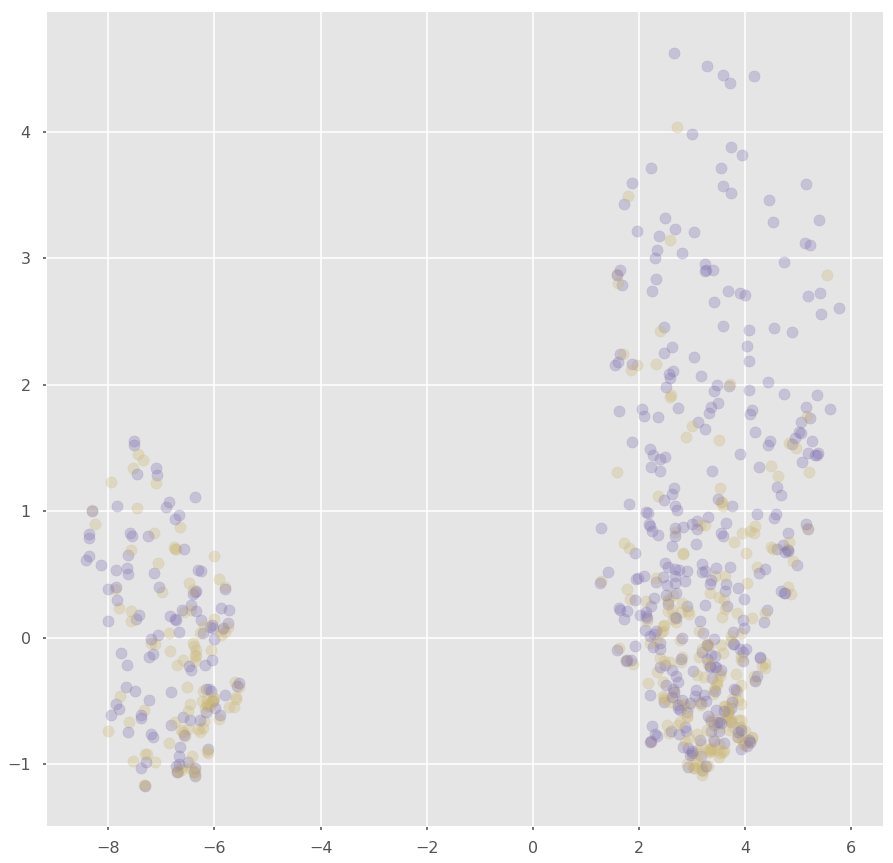

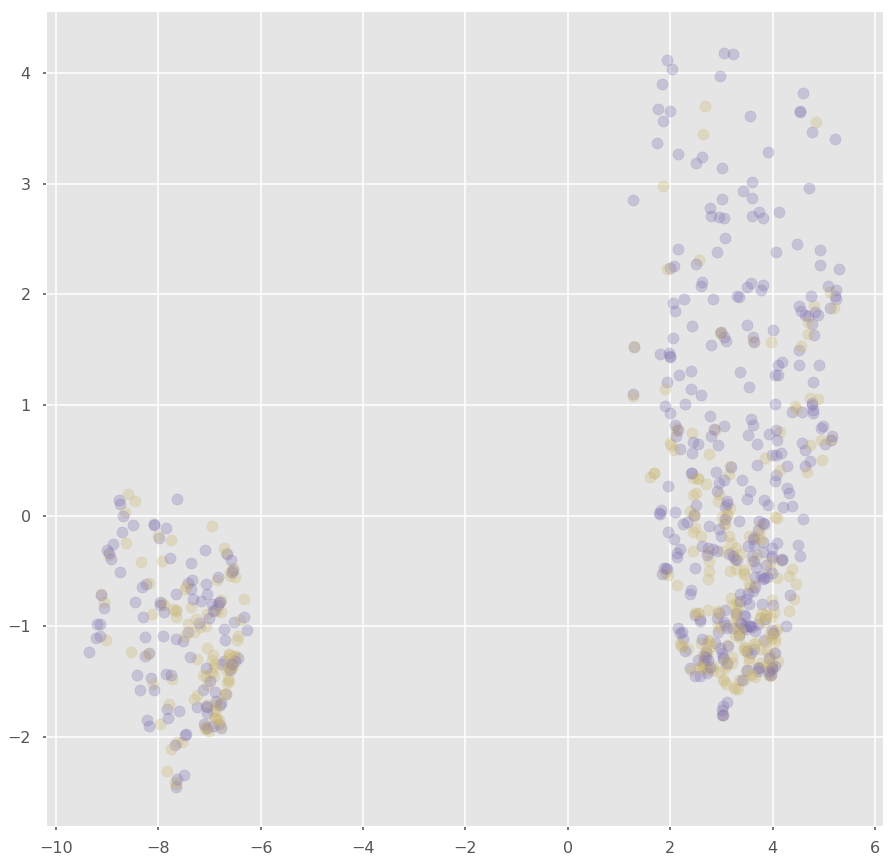

In [80]:
for _ in range(3):
    params = {
        #5 to 50, with a choice of 10 to 15 being a sensible default.
        "n_neighbors":5,

        #0.001 to 0.5, with 0.1 being a reasonable default.
        "min_dist":0.001,

        #metric: This determines the choice of metric used to measure distance in the input space. 
        "metric":'euclidean'
    }

    umap_embeddings = UMAP(**params).fit_transform(encodings)


    xx = umap_embeddings[:, 0]
    yy = umap_embeddings[:, 1]




    for x, y, c in zip(xx, yy, attractiveness_colors_lis): 
        if  c in {colors_pal[3], colors_pal[4]}: 
            plt.scatter(x, y, color=c, alpha=0.3)
    plt.show()

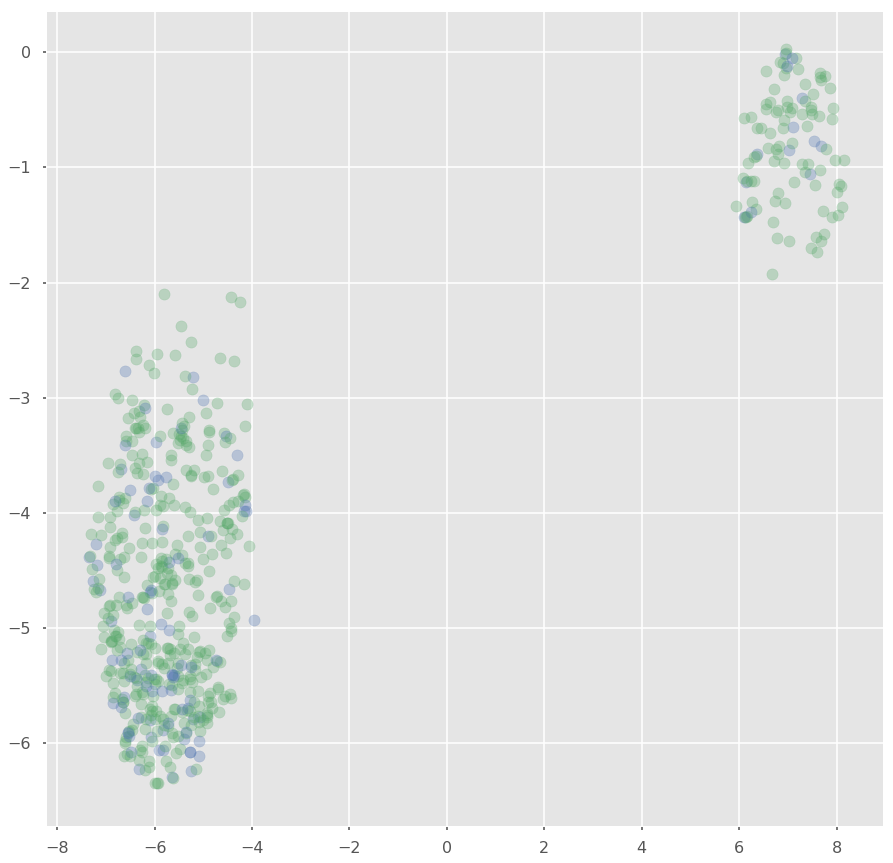

In [59]:
for x, y, c in zip(xx, yy, attractiveness_colors_lis): 
    if c in {colors_pal[0], colors_pal[1]}: 
        plt.scatter(x, y, color=c, alpha=0.3)

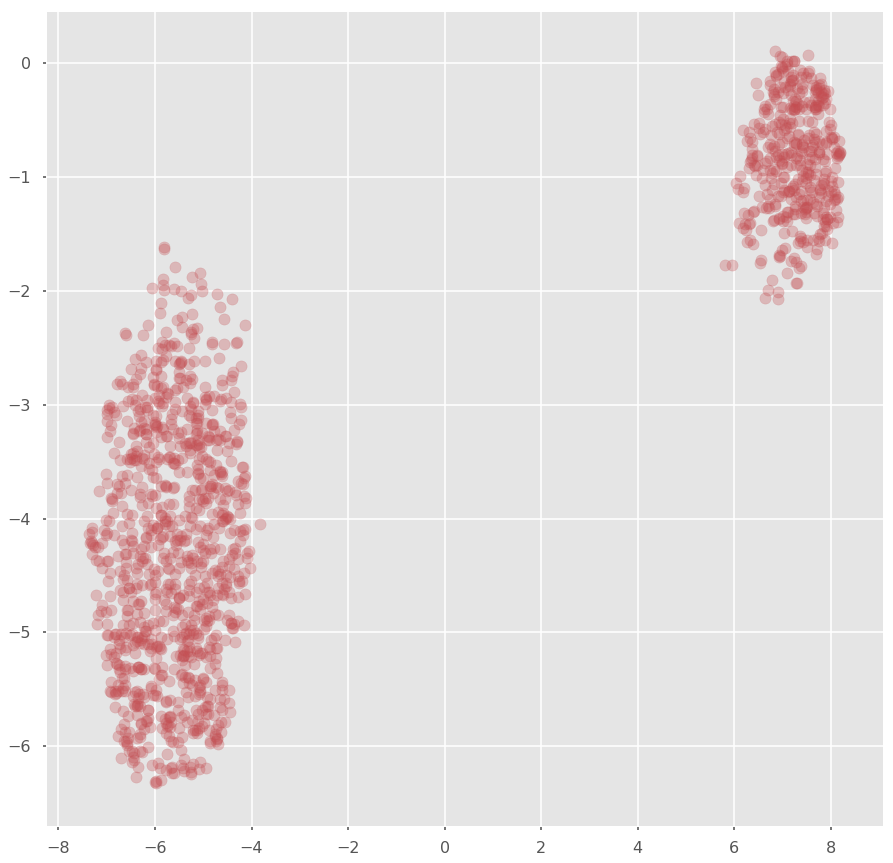

In [60]:
for x, y, c in zip(xx, yy, attractiveness_colors_lis): 
    if c in {colors_pal[2]}: 
        plt.scatter(x, y, color=c, alpha=0.3)

In [75]:
plot_data = image_scatter_plot(
                tsne_scatter_plot=umap_embeddings, 
                images=X, 
                res=10000
            )

print(plot_data.shape)
im = Image.fromarray(np.uint8(plot_data))
im.show()

(24736, 10128, 3)


In [46]:
data__, paths__, encodings__, arrays_rescaled__, X__ = load_encodings('../data/friends_pics_male_faces_encodings.pickle')
arrays_rescaled.extend(arrays_rescaled__) , encodings.extend(encodings__), paths.extend(paths__)
X = np.concatenate((X, X__)) 
len(encodings), len(paths), len(arrays_rescaled), X.shape[0]

(2747, 2747, 2747, 2747)

In [47]:
num_of_friends = len(data__)
num_of_friends

8

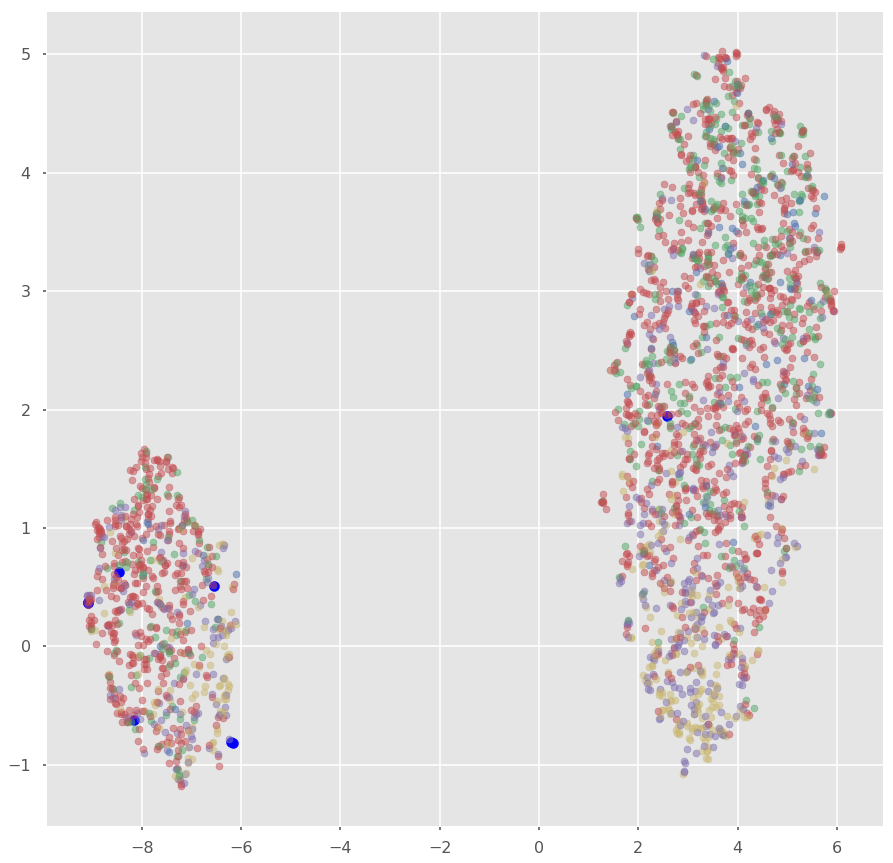

In [78]:
for x, y,in zip(xx[-num_of_friends:], yy[-num_of_friends:]): 
    plt.scatter(x, y, color='b', s=100)
    
for x, y, c in zip(xx[:-num_of_friends], yy[:-num_of_friends], attractiveness_colors_lis): 
    plt.scatter(x, y, color=c, alpha=0.3, s=50)

for x, y, c in zip(xx, yy, attractiveness_colors_lis): 
    plt.scatter(x, y, color=c, alpha=0.3, s=50)